In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [17]:
# 로컬에 저장한 파일
df_bus_100100073_weather = pd.read_csv("df_bus_100100073_weather.csv")

In [ ]:
import sys
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
import pandas as pd
import numpy as np

In [18]:
spark = SparkSession.builder.appName('dataframe').getOrCreate()
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

NameError: name 'SparkSession' is not defined

In [ ]:
# 서버와 스파크 사용할 때
df_bus_100100073_weather = pd.read_csv("/home/lab01/df_bus_100100073_weather.csv")

In [19]:
df_bus_100100073_weather = df_bus_100100073_weather[df_bus_100100073_weather['stationNm_x'].isin(['순천향대학병원.한남오거리','신사역.푸른저축은행','논현역','지하철2호선강남역','신분당선강남역','래미안아파트.파이낸셜뉴스','뱅뱅사거리'])]
df_bus_100100073_weather = df_bus_100100073_weather[df_bus_100100073_weather['stationNm_y'].isin(['순천향대학병원.한남오거리','신사역.푸른저축은행','논현역','지하철2호선강남역','신분당선강남역','래미안아파트.파이낸셜뉴스','뱅뱅사거리'])]

In [20]:
df_bus_100100073_weather['sectionId'] = df_bus_100100073_weather['sectionId'].astype('object')
df_bus_100100073_weather['PTY'] = df_bus_100100073_weather['PTY'].astype('object')

In [21]:
df_bus_100100073_weather['baseDateMinute']=df_bus_100100073_weather['baseDateMinute'].astype(str)
df_bus_100100073_weather['baseDateMinute']=df_bus_100100073_weather['baseDateMinute'].str[-4:]

In [22]:
df_bus_100100073_weather['baseHr']=df_bus_100100073_weather['baseDateMinute'].str[:2]
df_bus_100100073_weather['baseHr']=df_bus_100100073_weather['baseHr'].astype(int)
df_bus_100100073_weather['baseMn']=df_bus_100100073_weather['baseDateMinute'].str[2:]
df_bus_100100073_weather['baseMn']=df_bus_100100073_weather['baseMn'].astype(int)

In [23]:
#분으로만 시간 표기하기
#1125 -> 685
df_bus_100100073_weather['baseTm']= df_bus_100100073_weather['baseHr']*60 + df_bus_100100073_weather['baseMn']

In [24]:
df_bus_100100073_weather = df_bus_100100073_weather.drop({'baseHr','baseMn','Unnamed: 0'},axis=1)

In [25]:
df_bus_100100073_weather = df_bus_100100073_weather[df_bus_100100073_weather['PTY']!=-999]

In [26]:
df_bus_100100073_weather['newCon'] = [x-2 if x> 2 else 0 for x in df_bus_100100073_weather['congetion']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df_bus_100100073_weather[['fullSectDist','baseTm','RN1','T1H','VEC','WSD','newCon']], df_bus_100100073_weather['interval'],test_size=0.3, random_state=0)

# 선형 회귀를 이용하여 학습 및 예측 수행. 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {0: .3f}, RMSE : {0: .3f}' .format(lr_mse, lr_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, lr_preds)))

In [ ]:
R2 score는 실제 분산값과 비교한 결과로 1에 가까울 수록 정확도가 높은 것(p304) 예측 v/실제 v

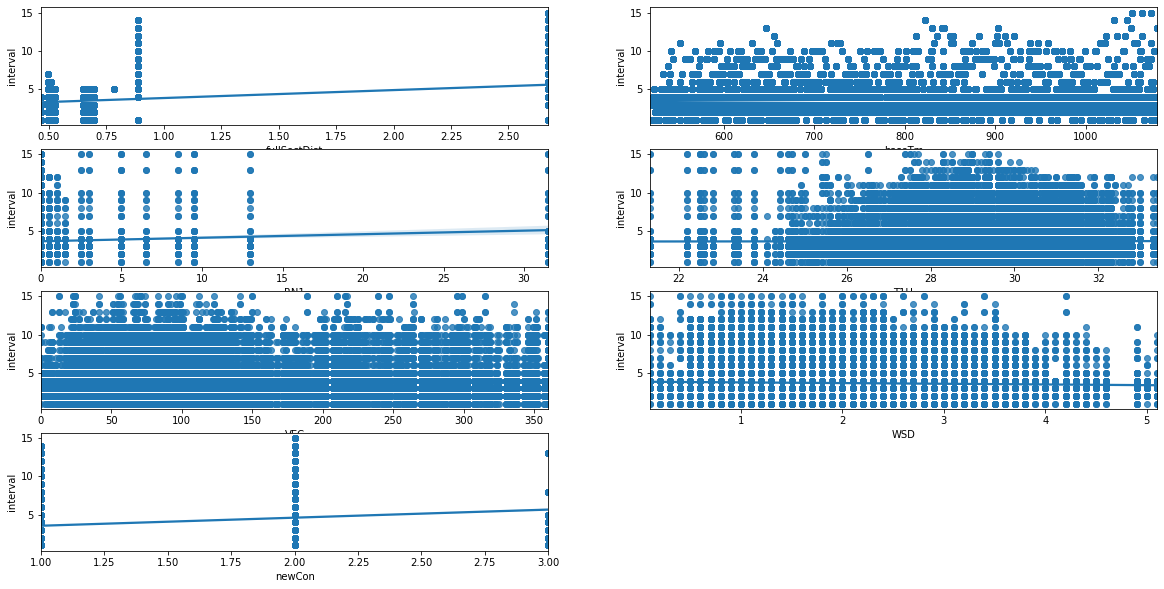

In [27]:
# 각 feature가 회귀 결과에 미치는 영향이 어느 정도인지 시각화 (linear)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
sns.regplot(x='fullSectDist',y='interval', data= df_bus_100100073_weather)
plt.subplot(4,2,2)
sns.regplot(x='baseTm',y='interval', data= df_bus_100100073_weather)
plt.subplot(4,2,3)
sns.regplot(x='RN1',y='interval', data= df_bus_100100073_weather)
plt.subplot(4,2,4)
sns.regplot(x='T1H',y='interval', data= df_bus_100100073_weather)
plt.subplot(4,2,5)
sns.regplot(x='VEC',y='interval', data= df_bus_100100073_weather)
plt.subplot(4,2,6)
sns.regplot(x='WSD',y='interval', data= df_bus_100100073_weather)
plt.subplot(4,2,7)
sns.regplot(x='newCon',y='interval', data= df_bus_100100073_weather)
plt.show()

**상단에서 가장 연관성이 높아 보였던 fullsectdist, RN1, WSD 만 넣고 linear regression을 돌린 결과**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_bus_100100073_weather[['fullSectDist','WSD','RN1']], df_bus_100100073_weather['interval'],test_size=0.3, random_state=0)


# 선형 회귀를 이용하여 학습 및 예측 수행. 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {: .3f}, RMSE : {: .3f}' .format(lr_mse, lr_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, lr_preds)))

MSE :  3.562, RMSE :  1.887
Variance score :  0.107


**타겟 정규화**

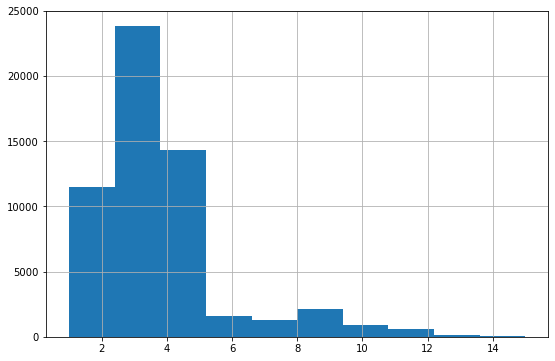

In [32]:
plt.figure(figsize=(9,6))
df_bus_100100073_weather['interval'].hist()
plt.show()

In [33]:
log_interval = np.log1p(df_bus_100100073_weather['interval'])

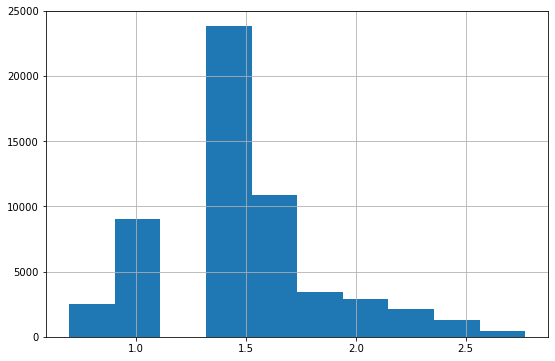

In [34]:
plt.figure(figsize=(9,6))
log_interval.hist()
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_bus_100100073_weather[['fullSectDist','WSD','RN1']], log_interval,test_size=0.3, random_state=0)

# 정규화 이후 선형 회귀를 이용하여 학습 및 예측 수행. 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {: .3f}, RMSE : {: .3f}' .format(lr_mse, lr_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, lr_preds)))

MSE :  0.113, RMSE :  0.337
Variance score :  0.124


**Random Forest**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_bus_100100073_weather[['sectionId','baseTm','RN1','T1H','VEC','WSD','newCon']], df_bus_100100073_weather['interval'],test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

rf_clf = RandomForestRegressor(random_state = 0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print('MSE : {: .3f}, RMSE : {: .3f}' .format(rf_mse, rf_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, rf_pred)))

MSE :  0.346, RMSE :  0.588
Variance score :  0.913


In [49]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [8, 10, 12],
 'min_samples_leaf': [1, 2, 4, 8],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100]}

rf_clf = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, scoring = mean_squared_error,cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : {0}' .format(grid_cv.best_params_))

최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [50]:
# 최적의 하이퍼 파라미터를 사용하여 ramdom forest regression
rf_clf1 = RandomForestRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

rf_clf1.fit(X_train,y_train)
rf1_pred = rf_clf1.predict(X_test)

rf1_mse = mean_squared_error(y_test, rf1_pred)
rf1_rmse = np.sqrt(rf1_mse)

print('MSE : {: .3f}, RMSE : {: .3f}' .format(rf1_mse, rf1_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, rf1_pred)))

MSE :  0.929, RMSE :  0.964
Variance score :  0.767


**정규화한 interval을 바탕으로 Random Forest Regression**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_bus_100100073_weather[['sectionId','baseTm','RN1','T1H','VEC','WSD','newCon']],  log_interval,test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

rf_clf = RandomForestRegressor(random_state = 0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print('MSE : {: .3f}, RMSE : {: .3f}' .format(rf_mse, rf_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, rf_pred)))

MSE :  0.017, RMSE :  0.130
Variance score :  0.869


In [40]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [8, 10, 12],
 'min_samples_leaf': [1, 2, 4, 8],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100]}

rf_clf = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, scoring = mean_squared_error,cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : {0}' .format(grid_cv.best_params_))

최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [52]:
# 최적의 하이퍼 파라미터를 사용하여 ramdom forest regression
rf_clf1 = RandomForestRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

rf_clf1.fit(X_train,y_train)
rf1_pred = rf_clf1.predict(X_test)

rf1_mse = mean_squared_error(y_test, rf1_pred)
rf1_rmse = np.sqrt(rf1_mse)

print('MSE : {: .3f}, RMSE : {: .3f}' .format(rf1_mse, rf1_rmse))
print('Variance score : {0: .3f}' .format(r2_score(y_test, rf1_pred)))

MSE :  0.045, RMSE :  0.213
Variance score :  0.649


**가장 MSE가 낮았던 마지막 모델의 각 feature별 중요도를 시각화**

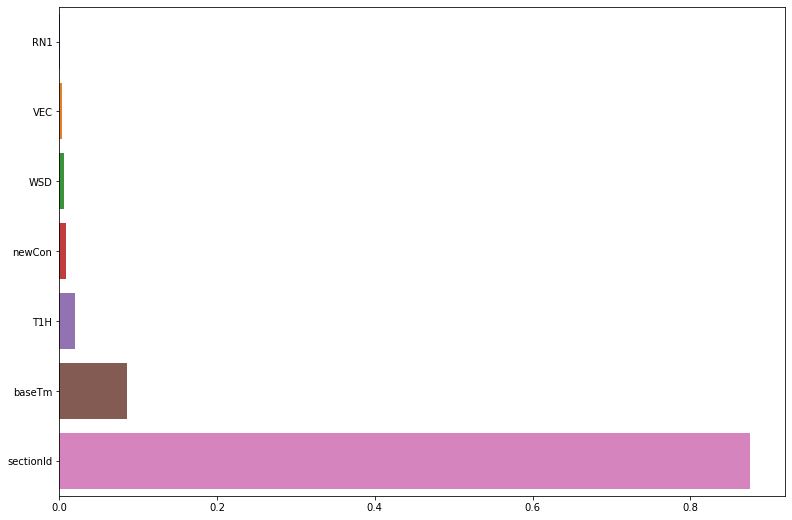

In [53]:
rf_clf1 = RandomForestRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
rf_clf1.fit(X_train,y_train)

feature_series = pd.Series(data=rf_clf1.feature_importances_, index = X_train.columns)
feature_series = feature_series.sort_values(ascending=True)
plt.figure(figsize=(13,9))
bar = sns.barplot(x= feature_series, y = feature_series.index)
plt.show(bar)